In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
from scipy.stats import norm, skewnorm
%matplotlib inline

baselinelevel 657.0032478074447
nlevel 1100.0
factor 9.073401205278586
peakheight 9980.74132581


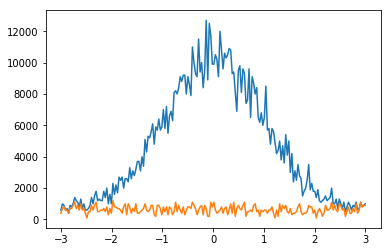

baselinelevel 2.3862154831687445
nlevel 100.0
factor 8.83867226144618
peakheight 883.867226145


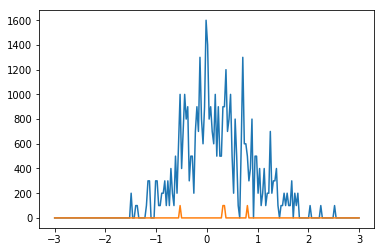

baselinelevel 67.7505410757861
nlevel 400.0
factor 8.358208923148453
peakheight 3343.28356926


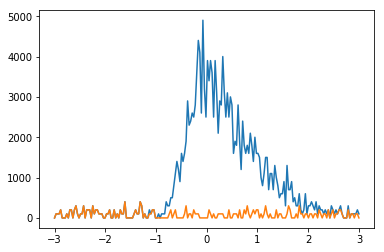

baselinelevel 1881.0447713969559
nlevel 2600.0
factor 12.093577159059532
peakheight 31443.3006136


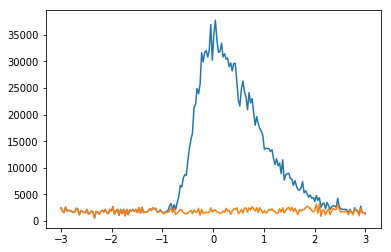

baselinelevel 49624.278515136786
nlevel 10900.0
factor 6.1259768179597724
peakheight 66773.1473158


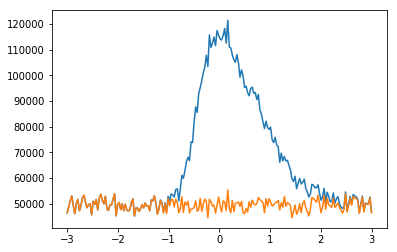

baselinelevel 238.56688892113158
nlevel 800.0
factor 12.611832847429703
peakheight 10089.4662779


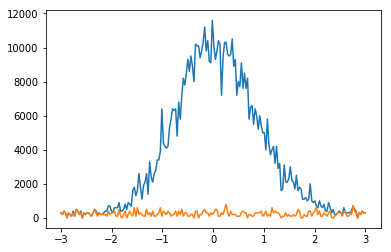

baselinelevel 11.640390787072983
nlevel 200.0
factor 12.389433560166992
peakheight 2477.88671203


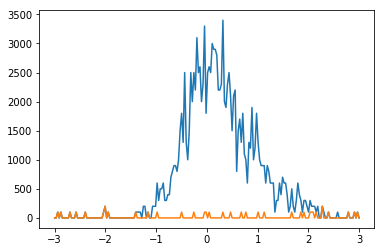

baselinelevel 4.296979656891437
nlevel 200.0
factor 3.5753130358926484
peakheight 715.062607179


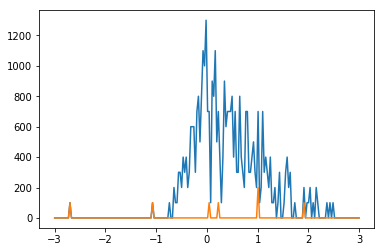

baselinelevel 2.5728094639059913
nlevel 100.0
factor 4.038654095587223
peakheight 403.865409559


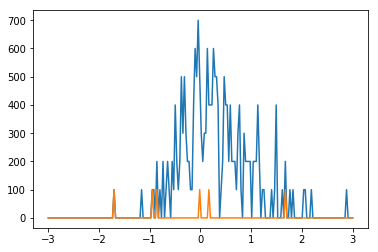

baselinelevel 46.364146985675134
nlevel 300.0
factor 10.74998265392755
peakheight 3224.99479618


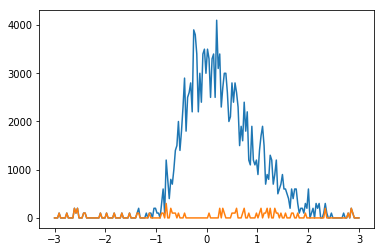

In [2]:
class peakmodel:
    @classmethod
    def spikenoise(cls, length, maxintensity):
        data = np.arange(length)
        print(data)
        return data
    @classmethod
    def peak(cls, maxcps, datapoints, dwelltime, skew = 0, sigma = 3, location = 0):
        location = 0
        scale = 1
        alpha = skew
#         delta = alpha / np.sqrt(1+alpha**2)
#         uz = np.sqrt(2/np.pi) * delta
#         sigmaz = np.sqrt(1.0-uz**2.0)
#         gamma = (4-np.pi)/2 * (delta*np.sqrt(2/np.pi))**3/(1-2*delta**2/np.pi)**(3/2)
#         moa = uz - (gamma * sigmaz / 2) - (np.sign(alpha))*np.exp(-2*np.pi/np.abs(alpha))
#         mode = location + scale * moa
#         _norm_ = skewnorm.pdf(x=mode, a=alpha, loc=location, scale=scale) # 標準正規分布の高さ

        times = np.linspace(-sigma, sigma, datapoints)                
        _refpeak_ = [skewnorm.pdf(x = time, a=alpha, loc=0, scale=scale) for time in times]
        _norm_ = np.max(_refpeak_)
        maxindex = np.argmax(_refpeak_)
        maxtime = times[maxindex]
        # refpeak = np.array(_refpeak_) * maxcps / _norm_
        refpeak = np.array([skewnorm.pdf(x=time, a=alpha, loc= location - maxtime, scale=scale) * maxcps / _norm_ for time in times])
        # print('maxindex:', maxindex)
        # print('maxpos:', maxtime)
        samplepeak = np.array([poisson(peak * dwelltime / 1000) * 1000 / dwelltime for peak in refpeak])
        return times, refpeak, samplepeak    
    @classmethod
    def baseline(cls, level, datapoints, dwelltime):
        sample = np.array([poisson(level * dwelltime / 1000) * 1000 / dwelltime for i in np.arange(datapoints)])
        variation = np.max(sample) - np.min(sample)
        
        return sample, variation
    @classmethod
    def spikenoise(cls, datapoints):
        sample = np.array([poisson(1) for i in np.arange(datapoints)])
        # print(sample)
        return sample
        
# noise = baselinenoise()
# peakmodel.spikenoise(10, 1)
for i in np.arange(10):
    baselinelevel = 10**(rand() * 5)
    base, noiselevel = peakmodel.baseline(level= baselinelevel, datapoints= 200, dwelltime=10)
    print('baselinelevel', baselinelevel)
    print('nlevel', noiselevel)
    #peakheight = 2 + rand() * 3    
    factor = 3 + rand() * 10
    print('factor', factor)
    peakheight = np.max([noiselevel, 10]) * factor
    skw = rand() * 5
    #peakheight = 10**peakheight
    print('peakheight', peakheight)
    times, refpeak, samplepeak = peakmodel.peak(maxcps = peakheight, datapoints = 200, dwelltime = 10, skew=skw)
    #spike = peakmodel.spikenoise(datapoints = 200) * peakheight / 30
    sample_with_noise = samplepeak + base
#     plt.plot(times, refpeak + baselinelevel)
    plt.plot(times, sample_with_noise)
    plt.plot(times, base)
    plt.show()
